# SWE Becnhmark & Price

## Course: Data Visualization
## Professor: Dr. Tweneboah
## Author: Lucas Spitzer

### Import Necessary Package(s)

In [1]:
# Importing Pandas, Matplotlib, & Seaborb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the master CSV file into a dataframe.

In [2]:
# Load master dataframe
df = pd.read_csv("data/master.csv")

### 2. Add & update SWE benchmark results based on:
- [SWE Benchmark Report | Independent Research](https://www.swebench.com/#verified)
- [Claude 3.7 Sonnet Release | Anthropic](https://www.anthropic.com/news/claude-3-7-sonnet)
- [Gemini 2.5 Pro Release | Google](https://blog.google/technology/google-deepmind/gemini-model-thinking-updates-march-2025/#gemini-2-5-pro)
- [o3 & o4-mini Release | OpenAI](https://openai.com/index/introducing-o3-and-o4-mini/)
- [DeepSeek-V3 Technical Report | DeepSeek](https://arxiv.org/pdf/2412.19437)
- [SWE RL Llama 3 Review | AI Papers Academy](https://aipapersacademy.com/swe-rl/)

In [3]:
# === Add missing rows ===
new_rows = pd.DataFrame([
    # ['Model Name',               'Version Release Date', 'Benchmark',          'Benchmark Score', 'Organization', 'Country']
    ['Claude 3.5 Sonnet',          '2024-06-20',           'SWE-Bench verified', 0.490,             'Anthropic',   'United States of America'],
    ['DeepSeek R1',                '2025-01-20',           'SWE-Bench verified', 0.492,             'DeepSeek',    'China'],
    ['DeepSeek V3',                '2024-12-26',           'SWE-Bench verified', 0.420,             'DeepSeek',    'China'],
    ['o1',                         '2024-12-17',           'SWE-Bench verified', 0.489,             'OpenAI',      'United States of America'],
    ['o3-mini',                    '2025-01-31',           'SWE-Bench verified', 0.493,             'OpenAI',      'United States of America'],
    ['SWE-RL (Llama 3)',           '2025-02-26',           'SWE-Bench verified', 0.412,             'Meta AI',     'United States of America'],
    ['GPT-4.5',                    '2025-02-27',           'SWE-Bench verified', 0.380,             'OpenAI',      'United States of America'],
    ['Gemini-2.5 Pro',             '2025-03-25',           'SWE-Bench verified', 0.638,             'Google',      'United States of America'],
    ['Claude 3.7 Sonnet (Custom)', '2025-02-24',           'SWE-Bench verified', 0.703,             'Anthropic',   'United States of America'],
    ['o3',                         '2025-04-16',           'SWE-Bench verified', 0.691,             'OpenAI',      'United States of America'],
    ['o4-mini',                    '2025-04-16',           'SWE-Bench verified', 0.681,             'OpenAI',      'United States of America'],
], columns=df.columns)

df = pd.concat([df, new_rows], ignore_index=True)

In [4]:
# Combine both conditions into a single boolean mask
mask1 = (
    (df["Model Name"] == "Claude 3.7 Sonnet") &
    (df["Benchmark"]  == "SWE-Bench verified")
)
df.loc[mask1, "Benchmark Score"] = 0.632

# Repeat for second update
mask2 = (
    (df["Model Name"] == "Gemini 2.0 Flash") &
    (df["Benchmark"]  == "SWE-Bench verified")
)
df.loc[mask2, "Benchmark Score"] = 0.522


# Remove duplciates
df = df.drop_duplicates()

# Now you can write out as before:
df.to_csv("data/master.csv", index=False)

### 3. SWE Bench Verifed Analysis & Visualization

In [5]:
# Filter for SWE-Bench verified and pick the top 5 by Benchmark Score
mask = df["Benchmark"] == "SWE-Bench verified"
top6 = df.loc[mask].nlargest(6, "Benchmark Score")

# Print out the results
print("Top 6 models on SWE-Bench verified:")
print(top6[["Model Name", "Benchmark Score"]].to_string(index=False))

Top 6 models on SWE-Bench verified:
                Model Name  Benchmark Score
Claude 3.7 Sonnet (Custom)            0.703
                        o3            0.691
                   o4-mini            0.681
            Gemini-2.5 Pro            0.638
         Claude 3.7 Sonnet            0.632
          Gemini 2.0 Flash            0.522


/var/folders/pb/36ss_pfd11n9x0ppvvv71rr80000gn/T/ipykernel_8619/3860312557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


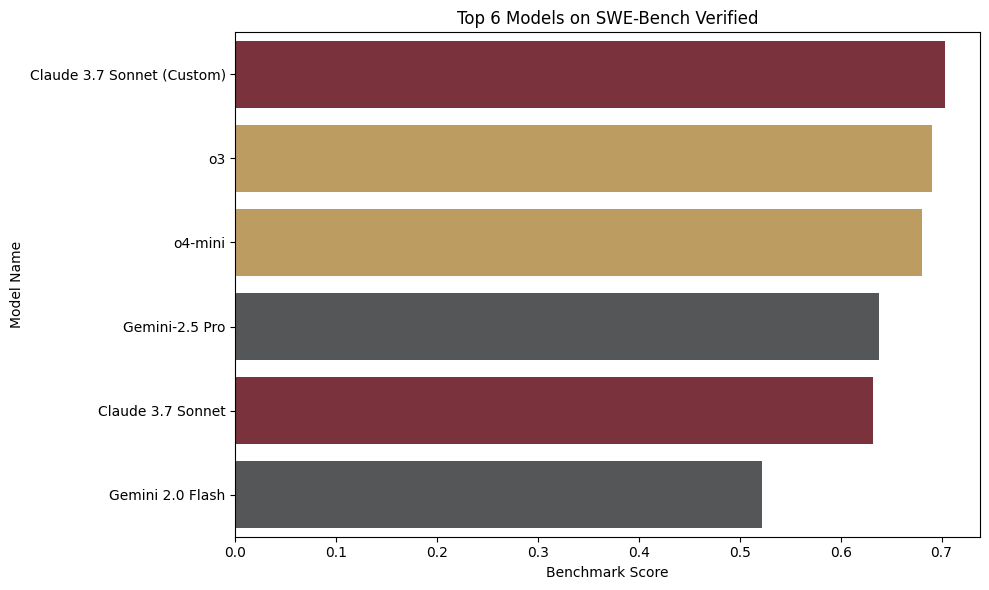

In [6]:
# Define color palette
palette = [
    "#CBA052"    if name in ("o3", "o4-mini")
  else "#545658" if name in ("Gemini-2.5 Pro", "Gemini 2.0 Flash")
  else "#862633"
  for name in top6["Model Name"]
]

# Display plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Benchmark Score",
    y="Model Name",
    data=top6,
    palette=palette
)
plt.title("Top 6 Models on SWE-Bench Verified")
plt.xlabel("Benchmark Score")
plt.ylabel("Model Name", rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Filter for SWE-Bench verified rows
swe_bench_df = df[df['Benchmark'] == 'SWE-Bench verified']

# Drop specific rows based on Model Name and Benchmark Score
swe_bench_df = swe_bench_df.drop(swe_bench_df[
    ((swe_bench_df['Model Name'] == 'o4-mini') & (swe_bench_df['Benchmark Score'] == 0.346)) |
    ((swe_bench_df['Model Name'] == 'Grok-3 mini') & (swe_bench_df['Benchmark Score'] == 0.152))
].index)

# Display the filtered dataframe
print("SWE-Bench verified models:")
print(swe_bench_df[['Model Name', 'Benchmark Score']].sort_values('Benchmark Score', ascending=False))



SWE-Bench verified models:
                     Model Name  Benchmark Score
334  Claude 3.7 Sonnet (Custom)            0.703
335                          o3            0.691
336                     o4-mini            0.681
333              Gemini-2.5 Pro            0.638
322           Claude 3.7 Sonnet            0.632
323            Gemini 2.0 Flash            0.522
330                     o3-mini            0.493
327                 DeepSeek R1            0.492
326           Claude 3.5 Sonnet            0.490
329                          o1            0.489
328                 DeepSeek V3            0.420
331            SWE-RL (Llama 3)            0.412
332                     GPT-4.5            0.380


### Add token cost column vlaues based on this [Artificial Analysis data](https://artificialanalysis.ai/models?models=o1%2Co3-mini%2Co3%2Co4-mini%2Cgemini-2-0-flash%2Cgemini-2-5-pro%2Cclaude-3-7-sonnet%2Cclaude-3-7-sonnet-thinking%2Cdeepseek-r1%2Cdeepseek-r1-distill-llama-70b%2Cdeepseek-v3-0324%2Cgpt-4-5%2Cclaude-35-sonnet).

In [8]:
# Create a dictionary mapping model names to their USD-per-Million-Tokens values
price_mapping = {
    'o4-mini': 5.5,
    'o3-mini': 5.5,
    'o1': 75,
    'o3': 50,
    'Gemini 2.0 Flash': 0.5,
    'Gemini-2.5 Pro': 11.25,
    'DeepSeek V3': 1.37,
    'DeepSeek R1': 2.74,
    'Claude 3.5 Sonnet': 18,
    'Claude 3.7 Sonnet': 18,
    'Claude 3.7 Sonnet (Custom)': 18
}

# Add the new column using the mapping
swe_bench_df['USD-per-Million-Tokens'] = swe_bench_df['Model Name'].map(price_mapping)

# Remove rows with null values
swe_bench_df = swe_bench_df.dropna()

# Display the filtered SWE-Bench verified dataframe with the new column
swe_bench_df = swe_bench_df[swe_bench_df['Benchmark'] == 'SWE-Bench verified']
print("SWE-Bench verified models with pricing:")
print(swe_bench_df[['Model Name', 'Benchmark Score', 'USD-per-Million-Tokens']].sort_values('Benchmark Score', ascending=False))

SWE-Bench verified models with pricing:
                     Model Name  Benchmark Score  USD-per-Million-Tokens
334  Claude 3.7 Sonnet (Custom)            0.703                   18.00
335                          o3            0.691                   50.00
336                     o4-mini            0.681                    5.50
333              Gemini-2.5 Pro            0.638                   11.25
322           Claude 3.7 Sonnet            0.632                   18.00
323            Gemini 2.0 Flash            0.522                    0.50
330                     o3-mini            0.493                    5.50
327                 DeepSeek R1            0.492                    2.74
326           Claude 3.5 Sonnet            0.490                   18.00
329                          o1            0.489                   75.00
328                 DeepSeek V3            0.420                    1.37


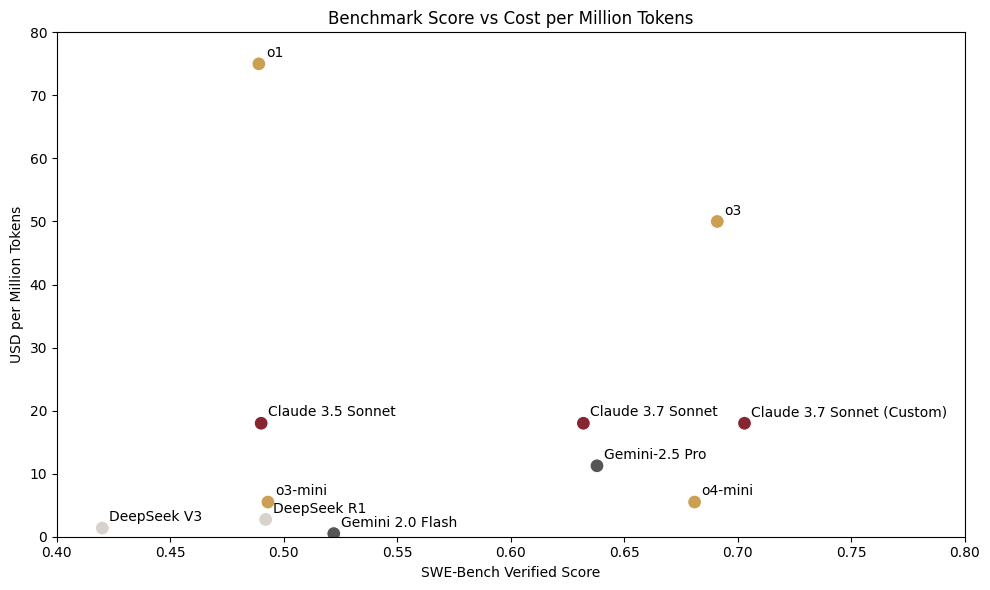

In [9]:
# Create a color mapping dictionary
color_mapping = {
    'Claude 3.5 Sonnet': '#862633',
    'Claude 3.7 Sonnet': '#862633',
    'Claude 3.7 Sonnet (Custom)': '#862633',
    'Gemini 2.0 Flash': '#545658',
    'Gemini-2.5 Pro': '#545658',
    'DeepSeek V3': '#D7D2CB',
    'DeepSeek R1': '#D7D2CB',
    'o4-mini': '#CBA052',
    'o3-mini': '#CBA052',
    'o1': '#CBA052',
    'o3': '#CBA052'
}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=swe_bench_df,
    x='Benchmark Score',
    y='USD-per-Million-Tokens',
    hue='Model Name',
    palette=color_mapping,
    s=100,  # Size of points
    legend=False  # This removes the legend
)

# Add labels and title
plt.title('Benchmark Score vs Cost per Million Tokens')
plt.xlabel('SWE-Bench Verified Score')
plt.ylabel('USD per Million Tokens')

# Set x-axis limits
plt.xlim(0.4, 0.8)

# Set y-axis limits
plt.ylim(0, 80)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add value labels to each point
for i, row in swe_bench_df.iterrows():
    plt.annotate(
        row['Model Name'],
        (row['Benchmark Score'], row['USD-per-Million-Tokens']),
        xytext=(5, 5),
        textcoords='offset points'
    )

# Show the plot
plt.show()

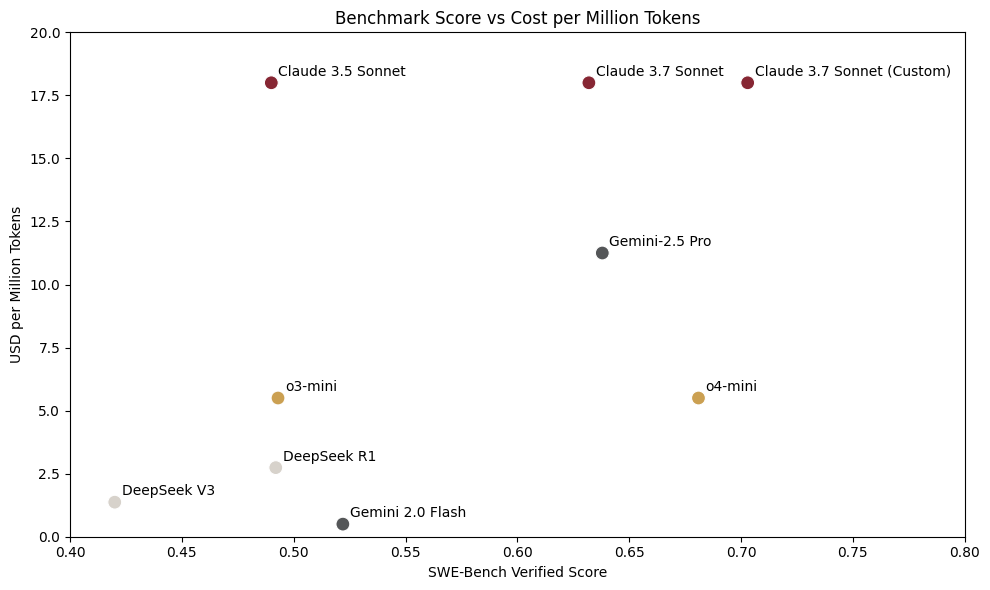

In [10]:
# Drop rows where Model Name is 'o1' or 'o3'
swe_bench_df2 = swe_bench_df[~swe_bench_df['Model Name'].isin(['o1', 'o3'])]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=swe_bench_df2,
    x='Benchmark Score',
    y='USD-per-Million-Tokens',
    hue='Model Name',
    palette=color_mapping,
    s=100,  # Size of points
    legend=False  # This removes the legend
)

# Add labels and title
plt.title('Benchmark Score vs Cost per Million Tokens')
plt.xlabel('SWE-Bench Verified Score')
plt.ylabel('USD per Million Tokens')

# Set x-axis limits
plt.xlim(0.4, 0.8)

# Set y-axis limits
plt.ylim(0, 20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add value labels to each point
for i, row in swe_bench_df2.iterrows():
    plt.annotate(
        row['Model Name'],
        (row['Benchmark Score'], row['USD-per-Million-Tokens']),
        xytext=(5, 5),
        textcoords='offset points'
    )

# Show the plot
plt.show()